TASK 1 c) The measurement of traffic quantity at a certain time can be viewed as a signal on the graph that
we constructed. In this graph, we cannot easily model time though. To also include this “dimension”
of the data, one can define a product graph of GT S with a graph representing time evolution, i.e.,
with a simple path graph GP with t nodes, where t is the number of considered time steps. Precisely,
this graph product is defined as
G
time
T S := AGT S ⊗ It + In ⊗ AGP
(3)
where ⊗ denotes the Kronecker product of matrices2
. In this graph, each node can be thought of as
corresponding to a particular sensor at a particular point in time. Write a function that constructs
a product graph for a user-specified time interval based on your graph GT S . Also write a function
that extracts traffic measurements for a given time range and maps it to a signal on the product
graph (e.g., represented as a vector)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_3 = pd.read_csv("bay_traffic.csv")
df_3.head()


,Unnamed: 0,Date,400001,400017,400030,400040,400045,400052,400057,400059,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
0,0,2017-01-01 00:00:00,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0,...,68.8,67.9,68.8,68.0,69.2,68.9,70.4,68.8,71.1,68.0
1,1,2017-01-01 00:30:00,71.3,67.6,70.1,67.2,68.5,66.8,65.7,67.8,...,68.5,67.3,68.5,67.7,68.5,68.9,70.0,68.5,70.8,67.5
2,2,2017-01-01 01:00:00,71.0,67.2,70.3,66.8,68.3,66.3,66.7,67.7,...,68.3,67.6,68.3,67.2,69.6,68.5,70.0,68.3,71.1,67.9
3,3,2017-01-01 01:30:00,71.3,67.4,70.0,67.4,68.3,66.5,66.4,67.7,...,68.3,67.7,68.3,67.3,70.3,68.4,69.8,68.2,71.1,67.5
4,4,2017-01-01 02:00:00,70.9,67.9,69.9,67.1,68.3,66.8,66.4,67.8,...,68.3,67.8,68.3,67.3,70.1,68.6,69.9,68.3,70.6,67.2


In [3]:
df_3['Date'] = pd.to_datetime(df_3['Date'].str.strip(), format='%Y-%m-%d %H:%M:%S')

In [4]:
df_3.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
400001               float64
400017               float64
400030               float64
                   ...      
413845               float64
413877               float64
413878               float64
414284               float64
414694               float64
Length: 327, dtype: object

In [5]:
df_3 = df_3.set_index('Date')
df_3.head()

,Unnamed: 0,400001,400017,400030,400040,400045,400052,400057,400059,400065,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0,66.8,...,68.8,67.9,68.8,68.0,69.2,68.9,70.4,68.8,71.1,68.0
2017-01-01 00:30:00,1,71.3,67.6,70.1,67.2,68.5,66.8,65.7,67.8,66.7,...,68.5,67.3,68.5,67.7,68.5,68.9,70.0,68.5,70.8,67.5
2017-01-01 01:00:00,2,71.0,67.2,70.3,66.8,68.3,66.3,66.7,67.7,65.9,...,68.3,67.6,68.3,67.2,69.6,68.5,70.0,68.3,71.1,67.9
2017-01-01 01:30:00,3,71.3,67.4,70.0,67.4,68.3,66.5,66.4,67.7,66.1,...,68.3,67.7,68.3,67.3,70.3,68.4,69.8,68.2,71.1,67.5
2017-01-01 02:00:00,4,70.9,67.9,69.9,67.1,68.3,66.8,66.4,67.8,65.7,...,68.3,67.8,68.3,67.3,70.1,68.6,69.9,68.3,70.6,67.2


In [6]:
df_3.index


DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-06-30 19:00:00', '2017-06-30 19:30:00',
               '2017-06-30 20:00:00', '2017-06-30 20:30:00',
               '2017-06-30 21:00:00', '2017-06-30 21:30:00',
               '2017-06-30 22:00:00', '2017-06-30 22:30:00',
               '2017-06-30 23:00:00', '2017-06-30 23:30:00'],
              dtype='datetime64[ns]', name='Date', length=8686, freq=None)

In [7]:
df_3.loc['2017-01-01 00:00:00']

Unnamed: 0     0.0
400001        71.4
400017        67.8
400030        70.5
400040        67.4
              ... 
413845        68.9
413877        70.4
413878        68.8
414284        71.1
414694        68.0
Name: 2017-01-01 00:00:00, Length: 326, dtype: float64

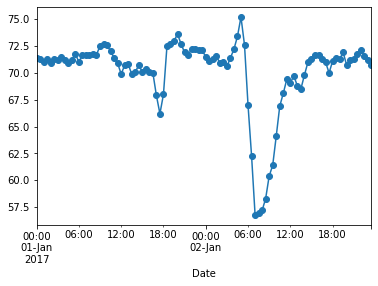

In [8]:
ax = df_3.loc['2017-01-01':'2017-01-02', '400001'].plot(marker='o', linestyle='-')


In [9]:
pd.date_range('2017-01-01', periods=12, freq='H')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               '2017-01-01 10:00:00', '2017-01-01 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [10]:
df_3.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-06-30 19:00:00', '2017-06-30 19:30:00',
               '2017-06-30 20:00:00', '2017-06-30 20:30:00',
               '2017-06-30 21:00:00', '2017-06-30 21:30:00',
               '2017-06-30 22:00:00', '2017-06-30 22:30:00',
               '2017-06-30 23:00:00', '2017-06-30 23:30:00'],
              dtype='datetime64[ns]', name='Date', length=8686, freq=None)

In [11]:
pd.date_range('2017-01-01', '2017-06-30', freq='D')

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', length=181, freq='D')

In [12]:
data_columns = ['400001', '400017', '400030']
# Resample to weekly frequency, aggregating with mean
daily_mean = df_3[data_columns].resample('D').mean()
daily_mean.head(20)

,400001,400017,400030
Date,,,
2017-01-01,71.212500,67.043750,67.083333
2017-01-02,68.997917,62.200000,63.012500
2017-01-03,68.525000,57.335417,58.037500
2017-01-04,67.800000,57.406250,58.660417
2017-01-05,67.433333,56.712500,59.254167
2017-01-06,69.320833,58.762500,59.654167
2017-01-07,69.843750,63.037500,62.552083
2017-01-08,67.941667,63.091667,63.164583
2017-01-09,61.712500,56.862500,58.620833


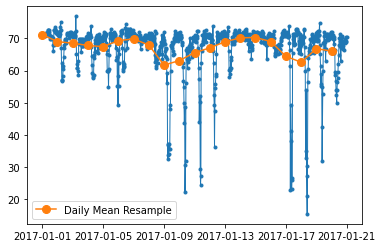

In [13]:
start, end = '2017-01-01', '2017-01-20'
# Plot daily resampled time series together
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = (20,3)
ax1.plot(df_3.loc[start:end, ['400001']],
marker='.', linestyle='-', linewidth=1)
ax1.plot(daily_mean.loc[start:end, ['400001']],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')

ax1.legend();

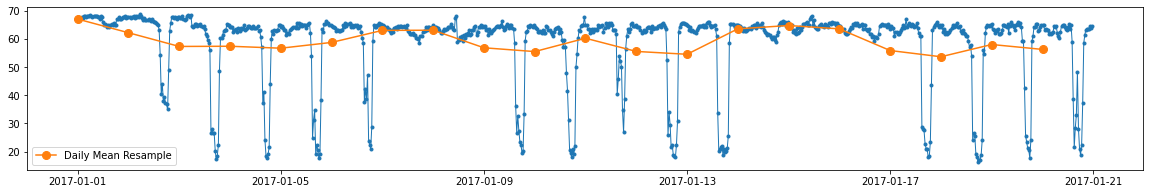

In [14]:
start, end = '2017-01-01', '2017-01-20'
# Plot daily resampled time series together
fig, ax2 = plt.subplots()
plt.rcParams["figure.figsize"] = (20,3)
ax2.plot(df_3.loc[start:end, ['400017']],
marker='.', linestyle='-', linewidth=1)
ax2.plot(daily_mean.loc[start:end, ['400017']],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')

ax2.legend();

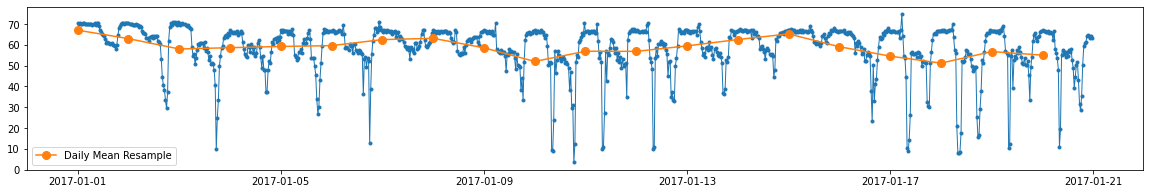

In [15]:
start, end = '2017-01-01', '2017-01-20'
# Plot daily resampled time series together
fig, ax3 = plt.subplots()
plt.rcParams["figure.figsize"] = (20,3)
ax3.plot(df_3.loc[start:end, ['400030']],
marker='.', linestyle='-', linewidth=1)
ax3.plot(daily_mean.loc[start:end, ['400030']],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')

ax3.legend();

In [16]:
from scipy import fft, ifft

In [17]:
time_step = 0.001
t = np.arange(0,1,time_step)
n = len(t)

In [18]:
fourier_coefficients = np.fft.fft(df_3.loc[start:end, ['400001']], n)
power_spectral_density = 1/n * fourier_coefficients * fourier_coefficients.conj()
frequencies = (1/(time_step*n)) * np.arange(n)
fourier_coefficients.shape

(960, 1000)

In [19]:
frequencies.shape

(1000,)

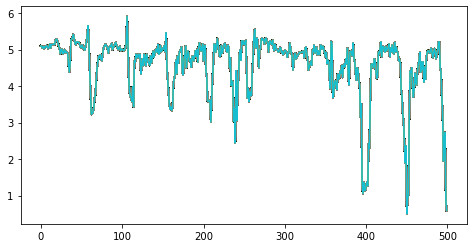

In [20]:
%matplotlib inline 
fig2 = plt.figure(figsize=(8,4))
plt.plot(frequencies[:n//2], power_spectral_density[:n//2].real);

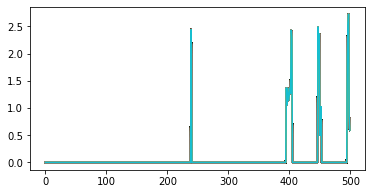

In [21]:
mask = power_spectral_density < 3
cleaned_power_spectral_density = power_spectral_density * mask
fig3 = plt.figure(figsize=(6,3))
plt.plot(frequencies[:n//2], cleaned_power_spectral_density[:n//2].real);

In [22]:
noisysignal = df_3.loc[start:end, ['400001']]
noisysignal

,400001
Date,
2017-01-01 00:00:00,71.4
2017-01-01 00:30:00,71.3
2017-01-01 01:00:00,71.0
2017-01-01 01:30:00,71.3
2017-01-01 02:00:00,70.9
...,...
2017-01-20 21:30:00,69.7
2017-01-20 22:00:00,69.1
2017-01-20 22:30:00,70.4


Text(0.5, 1.0, 'Denoised signal')

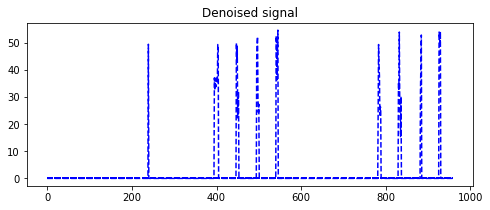

In [76]:
import warnings
warnings.filterwarnings('ignore')

cleaned_fourier_coefficients = fourier_coefficients * mask
denoised_signal = np.fft.ifft(cleaned_fourier_coefficients)
fig = plt.figure(figsize=(8,3))

plt.plot(denoised_signal, color='blue', linestyle='dashed');
plt.title("Denoised signal")